# Model fit

Measured through negative log-likelihood on a test set.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from mixmarkov.plotting import setup_plotting

In [2]:
setup_plotting()

Plotting settings loaded!


In [3]:
data = [
    {
        "name": "sleep",
        "vals": (
            ("CTMC", 255.307),
            ("RNN", 251.010),
            ("Fin. mix.", 250.613),
            ("Inf. mix.", 249.733),
        )
    },
    {
        "name": "venticu",
        "vals": (
            ("CTMC", 5.764),
            ("RNN", 5.767),
            ("Fin. mix.", 5.738),
            ("Inf. mix.", 5.737),
        )
    },
    {
        "name": "ebmt",
        "vals": (
            ("CTMC", 12.346),
            ("RNN", 12.945),
            ("Fin. mix", 10.792),
            ("Inf. mix.", 9.918),
        )
    },
    {
        "name": "customers",
        "vals": (
            ("DTMC", 4.888),
            ("RNN", 4.476),
            ("Fin. mix.", 4.503),
            ("Inf. mix.", 4.420),
        )
    },
]

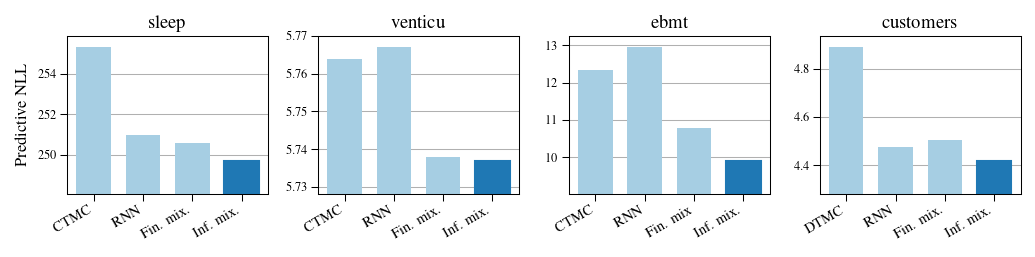

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(8.2, 1.4))

for i, ax in enumerate(axs.ravel()):
    labels, ys = map(np.array, zip(*data[i]["vals"]))
    idx = np.arange(len(labels))
    bars = ax.bar(idx, ys, width=0.7, color=plt.cm.Paired(0))
    bars[-1].set_color(plt.cm.Paired(1))
    top = 1.15 * np.max(ys)
    ax.set_title(data[i]["name"], pad=4.0)
    #ax.set_yticks(data[i]["ticks"])
    ymin = ys.min()
    ymax = ys.max()
    bottom = ymin - (ymax - ymin) * 0.3
    top = ymax + (ymax - ymin) * 0.1
    ax.set_ylim(bottom=bottom, top=top)
    ax.set_xticks(idx)
    ax.set_xticklabels(labels, ha="right", rotation=30)
    ax.grid(axis="y", lw=0.5)
    ax.set_axisbelow(True)
    ax.tick_params(axis='y', labelsize=6, pad=1.5)
    ax.tick_params(axis='x', labelsize=7, pad=1.0)
    
axs[0].set_ylabel(r"Predictive NLL")

fig.subplots_adjust(wspace=0.25)
fig.savefig("modelfit.pdf", bbox_inches="tight")